In [33]:
from pycoingecko import CoinGeckoAPI
import pandas as pd
import plotly.graph_objects as go


cg=CoinGeckoAPI()

bitcoin_data=cg.get_coin_market_chart_by_id(id="bitcoin",vs_currency="usd",days=30)

bitcoin_price_data=bitcoin_data["prices"]

dataBTC=pd.DataFrame(bitcoin_price_data,columns=["TimeStamp","Price"])

dataBTC["Date"]=pd.to_datetime(dataBTC["TimeStamp"],unit="ms")

candlestick_dataBTC=dataBTC.groupby(dataBTC.Date.dt.date).agg({"Price":["min","max","first","last"]})

ethereum_data=cg.get_coin_market_chart_by_id(id="ethereum",vs_currency="usd",days=30)

ethereum_price_data=ethereum_data["prices"]

dataETH=pd.DataFrame(ethereum_price_data,columns=["TimeStamp","Price"])

dataETH["Date"]=pd.to_datetime(dataETH["TimeStamp"],unit="ms")

candlestick_dataETH=dataETH.groupby(dataETH.Date.dt.date).agg({"Price":["min","max","first","last"]})



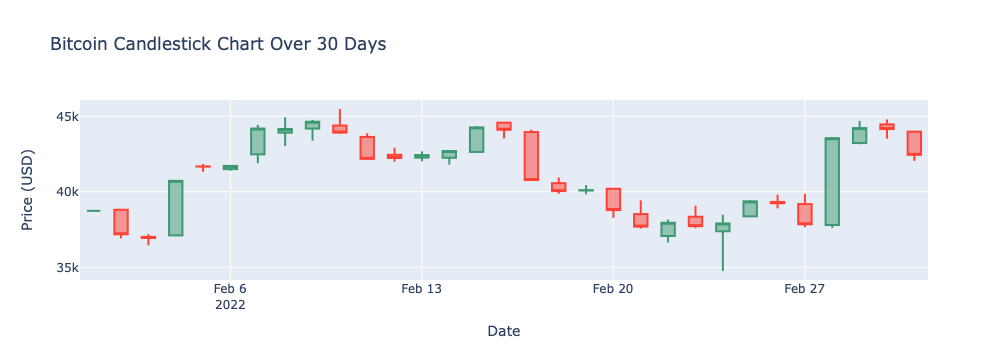

In [34]:
fig=go.Figure(data=[go.Candlestick(x=candlestick_dataBTC.index,
                    open=candlestick_dataBTC["Price"]["first"],
                    high=candlestick_dataBTC["Price"]["max"],
                    low=candlestick_dataBTC["Price"]["min"],
                    close=candlestick_dataBTC["Price"]["last"])
                    ])

fig.update_layout(xaxis_rangeslider_visible=False,xaxis_title="Date",yaxis_title="Price (USD)"
                  ,title="Bitcoin Candlestick Chart Over 30 Days")

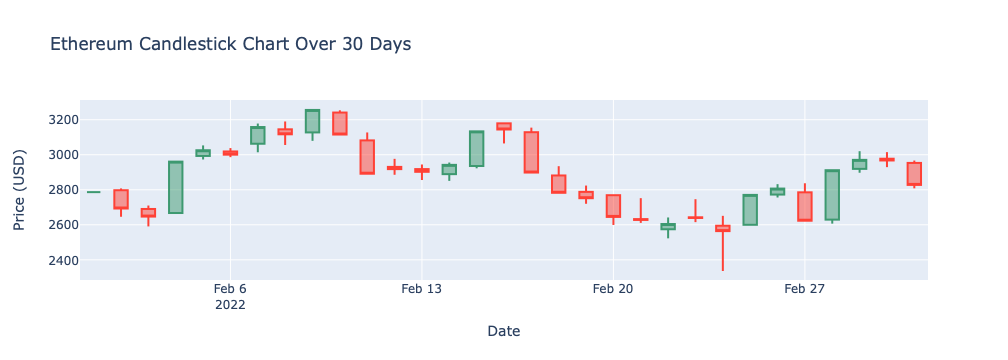

In [35]:
fig=go.Figure(data=[go.Candlestick(x=candlestick_dataETH.index,
                    open=candlestick_dataETH["Price"]["first"],
                    high=candlestick_dataETH["Price"]["max"],
                    low=candlestick_dataETH["Price"]["min"],
                    close=candlestick_dataETH["Price"]["last"])
                    ])

fig.update_layout(xaxis_rangeslider_visible=False,xaxis_title="Date",yaxis_title="Price (USD)"
                  ,title="Ethereum Candlestick Chart Over 30 Days")